# prepare

In [1]:
#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import numpy as np
import pandas as pd  
import gensim#For topic modeling
import lucem_illud

#access lda model
import logging
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [1]:
now_df = pd.read_table('data/sample.txt' ,header=0, encoding='gb2312', sep=',') 
now_df

,id,text,month,year
0,1705816,"For those of us who have not known war , the ...",11,10
1,4512620,"Kazi Khaleed Ashraf ONCE upon a time , Dhak...",3,10
2,1448476,There is a myth in wide circulation that the ...,4,10
3,1490802,Please turn on JavaScript . Media requires Ja...,5,10
4,1647381,Image caption The death of Mono Jojoy could c...,9,10
...,...,...,...,...
45425,31034526,Can an academic study also double up as a riv...,6,19
45426,50673735,"Glasgow Southside , where Nicola Sturgeon is ...",5,19
45427,31262587,"Rabbi Joachim Prinz , second from the left , ...",9,19
45428,50662844,The global rate of species extinction is ten ...,5,19


In [2]:
now_df = now_df.dropna(axis = 0)

In [3]:
#randomly sample 2 news from each year
#now_df = now_df.groupby('year').apply(lambda x: x.sample(400, random_state = 123)).reset_index(drop=True)
#now_df

In [4]:
#now_df.to_csv("data/small_sample.txt", index=False)

In [5]:
#initialize
nowTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
nowTFVects = nowTFVectorizer.fit_transform(now_df['text'])

In [6]:
now_df['tokenized_text'] = now_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
now_df['normalized_tokens'] = now_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [7]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

now_df['reduced_tokens'] = now_df['normalized_tokens'].apply(lambda x: dropMissing(x, nowTFVectorizer.vocabulary_.keys()))

In [22]:
now_df.to_csv("data/preprocessed inequality news.txt", index=False)

In [23]:
%store now_df

Stored 'now_df' (DataFrame)


In [2]:
%store -r now_df

In [3]:
now_df

,id,text,month,year,tokenized_text,normalized_tokens,reduced_tokens
0,1705816,"For those of us who have not known war , the ...",11,10,"[For, those, of, us, who, have, not, known, wa...","[know, war, word, soldier, help, understand, r...","[know, war, word, help, understand, day, war, ..."
1,4512620,"Kazi Khaleed Ashraf ONCE upon a time , Dhak...",3,10,"[Kazi, Khaleed, Ashraf, ONCE, upon, a, time, D...","[kazi, khaleed, ashraf, time, dhaka, fine, cit...","[city, street, heart, city, air, sense, commun..."
2,1448476,There is a myth in wide circulation that the ...,4,10,"[There, is, a, myth, in, wide, circulation, th...","[myth, wide, circulation, superiority, free, t...","[free, trade, simply, question, agree, course,..."
3,1490802,Please turn on JavaScript . Media requires Ja...,5,10,"[Please, turn, on, JavaScript, Media, requires...","[turn, javascript, medium, require, javascript...","[turn, play, foreign, secretary, say, place, b..."
4,1647381,Image caption The death of Mono Jojoy could c...,9,10,"[Image, caption, The, death, of, Mono, Jojoy, ...","[image, caption, death, mono, jojoy, cause, fr...","[death, cause, group, military, successful, ga..."
...,...,...,...,...,...,...,...
45425,31034526,Can an academic study also double up as a riv...,6,19,"[Can, an, academic, study, also, double, up, a...","[academic, study, double, rivet, thriller, lon...","[academic, study, london, sense, movement, cen..."
45426,50673735,"Glasgow Southside , where Nicola Sturgeon is ...",5,19,"[Glasgow, Southside, where, Nicola, Sturgeon, ...","[glasgow, southside, nicola, sturgeon, msp, hi...","[high, level, child, poverty, research, daily,..."
45427,31262587,"Rabbi Joachim Prinz , second from the left , ...",9,19,"[Rabbi, Joachim, Prinz, second, from, the, lef...","[rabbi, joachim, prinz, leave, join, leave, re...","[leave, leave, president, photo, march, washin..."
45428,50662844,The global rate of species extinction is ten ...,5,19,"[The, global, rate, of, species, extinction, i...","[global, rate, species, extinction, time, high...","[global, rate, high, average, past, continue, ..."


# set up the bag of words for lda

In [4]:
dictionary = gensim.corpora.Dictionary(now_df['reduced_tokens'])

In [5]:
corpus = [dictionary.doc2bow(text) for text in now_df['reduced_tokens']]

In [6]:
gensim.corpora.MmCorpus.serialize('data/now.mm', corpus)
nowmm = gensim.corpora.MmCorpus('data/now.mm')

# heatmap etc. from week 6 hw 找到合适的模型之后

In [11]:
#nowlda = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [12]:
ldaDF = pandas.DataFrame({
        'id' : now_df['id'],
        'year' : now_df['year'],
        'topics' : [nowlda10[dictionary.doc2bow(l)] for l in now_df['reduced_tokens']]
    })

In [13]:
ldaDF

,id,year,topics
0,1705816,10,"[(1, 0.35556296), (2, 0.29073885), (6, 0.03472..."
1,4512620,10,"[(0, 0.5492014), (2, 0.36575308), (7, 0.081064..."
2,1448476,10,"[(2, 0.40698475), (7, 0.5890146)]"
3,1490802,10,"[(3, 0.33775857), (4, 0.5455171), (9, 0.100101..."
4,1647381,10,"[(2, 0.06426404), (3, 0.35325813), (7, 0.02825..."
...,...,...,...
45425,31034526,19,"[(0, 0.19514017), (2, 0.2568241), (4, 0.107178..."
45426,50673735,19,"[(0, 0.11925873), (1, 0.12498532), (6, 0.75248..."
45427,31262587,19,"[(1, 0.26827264), (2, 0.29110786), (3, 0.23819..."
45428,50662844,19,"[(0, 0.10027245), (2, 0.1812993), (7, 0.655724..."


In [14]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(nowlda10.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(nowlda10.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

In [15]:
#randomly sample 2 news from each year
df = ldaDF.groupby('year').apply(lambda x: x.sample(2, random_state = 123)).reset_index(drop=True)
df

,id,year,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,1563224,10,"[(0, 0.19737719), (1, 0.25121605), (2, 0.02343...",0.197377,0.251216,0.023439,0.305334,0.000000,0.000000,0.000000,0.222140,0.000000,0.000000
1,1451590,10,"[(2, 0.17663), (3, 0.35868937), (4, 0.01981120...",0.000000,0.000000,0.176630,0.358689,0.019811,0.000000,0.000000,0.044818,0.000000,0.398707
2,4111108,11,"[(2, 0.9070849), (7, 0.090509355)]",0.000000,0.000000,0.907085,0.000000,0.000000,0.000000,0.000000,0.090509,0.000000,0.000000
3,4244553,11,"[(1, 0.13919313), (2, 0.20392285), (4, 0.56962...",0.000000,0.139193,0.203923,0.000000,0.569625,0.000000,0.000000,0.000000,0.085959,0.000000
4,1237839,12,"[(0, 0.05249557), (1, 0.2063904), (5, 0.352768...",0.052496,0.206390,0.000000,0.000000,0.000000,0.352768,0.026687,0.272568,0.000000,0.088270
5,830162,12,"[(0, 0.09995695), (1, 0.040037848), (2, 0.3420...",0.099957,0.040038,0.342043,0.329765,0.052972,0.000000,0.090882,0.043788,0.000000,0.000000
6,561358,13,"[(0, 0.38417053), (1, 0.42062658), (3, 0.18540...",0.384171,0.420627,0.000000,0.185409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2027451,13,"[(1, 0.1014835), (2, 0.13685983), (3, 0.122484...",0.000000,0.101484,0.136860,0.122485,0.029026,0.000000,0.000000,0.102843,0.040838,0.465207
8,4615147,14,"[(6, 0.030670589), (7, 0.16512878), (9, 0.8018...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030671,0.165129,0.000000,0.801853
9,2307789,14,"[(0, 0.16879246), (2, 0.1874806), (6, 0.291711...",0.168792,0.000000,0.187481,0.000000,0.000000,0.000000,0.291712,0.000000,0.000000,0.344595


In [16]:
ldaDFV = df[['topic_%d' %x for x in range(10)]]
ldaDFVisN = df[['year']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.197377,0.251216,0.023439,0.305334,0.000000,0.000000,0.000000,0.222140,0.000000,0.000000
1,0.000000,0.000000,0.176630,0.358689,0.019811,0.000000,0.000000,0.044818,0.000000,0.398707
2,0.000000,0.000000,0.907085,0.000000,0.000000,0.000000,0.000000,0.090509,0.000000,0.000000
3,0.000000,0.139193,0.203923,0.000000,0.569625,0.000000,0.000000,0.000000,0.085959,0.000000
4,0.052496,0.206390,0.000000,0.000000,0.000000,0.352768,0.026687,0.272568,0.000000,0.088270
5,0.099957,0.040038,0.342043,0.329765,0.052972,0.000000,0.090882,0.043788,0.000000,0.000000
6,0.384171,0.420627,0.000000,0.185409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.101484,0.136860,0.122485,0.029026,0.000000,0.000000,0.102843,0.040838,0.465207
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030671,0.165129,0.000000,0.801853
9,0.168792,0.000000,0.187481,0.000000,0.000000,0.000000,0.291712,0.000000,0.000000,0.344595


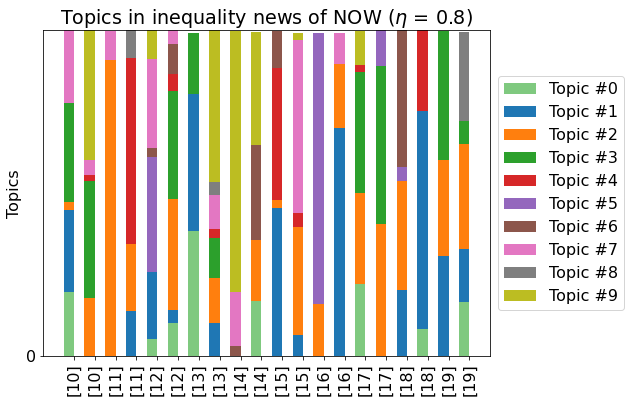

In [17]:
N = 20
ind = np.arange(N)
K = nowlda10.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)
plt.rc('font', size=16)
plt.figure(figsize = (8, 6))

for k in range(K):
    color = plt.cm.Accent(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in inequality news of NOW ($\eta$ = 0.8)')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

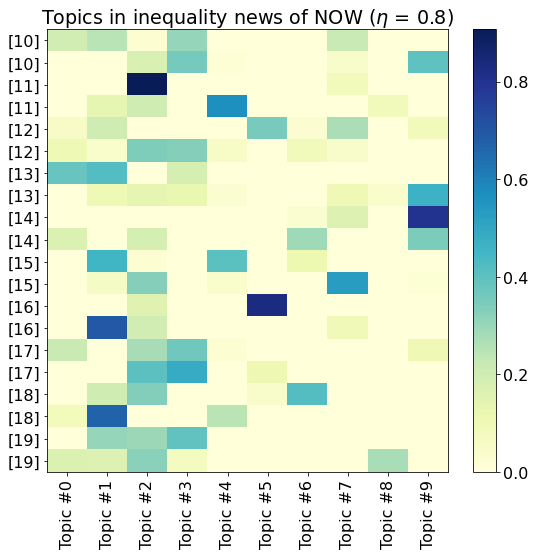

In [18]:
plt.figure(figsize = (8,8))
plt.pcolor(ldaDFVis, norm=None, cmap='YlGnBu')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);
plt.title('Topics in inequality news of NOW ($\eta$ = 0.8)')
# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='YlGnBu')
plt.tight_layout()  # fixes margins
plt.show()

In [19]:
topicsDict = {}
for topicNum in range(nowlda10.num_topics):
    topicWords = [w for w, p in nowlda10.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,city,tax,think,party,school,woman,child,economic,south,state
1,say,income,know,say,student,gender,health,growth,africa,right
2,house,pay,way,trump,education,man,family,economy,black,india
3,community,wealth,work,president,university,say,say,business,african,political
4,work,high,thing,election,say,work,poverty,development,anc,law
5,local,rate,come,vote,high,female,live,global,white,social
6,area,cent,say,political,college,equality,work,sector,say,say
7,service,low,want,campaign,research,violence,care,need,land,society
8,police,wage,look,state,work,sexual,age,policy,president,human
9,public,increase,day,candidate,public,pay,life,market,africans,power


<Figure size 432x288 with 0 Axes>

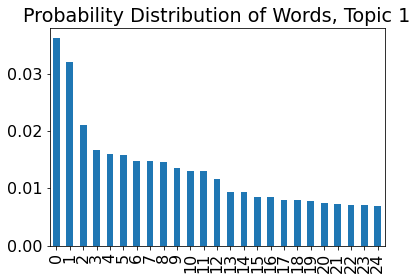

In [20]:
topic1_df = pandas.DataFrame(nowlda10.show_topic(1, topn=25))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

<Figure size 432x288 with 0 Axes>

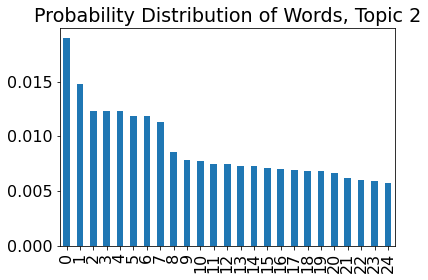

In [21]:
topic_df = pandas.DataFrame(nowlda10.show_topic(2, topn=25))
plt.figure()
topic_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 2')
plt.show()

# evaluate using topic coherence and perplexity

𝛼  controls the sparsity of document-topic loadings, and 𝜂 controls the sparsity of topic-word loadings.

In [ ]:
um = []
cv = []
p = []
for num_topics in range(2,16):
    print(num_topics)
    nowlda1 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=num_topics, alpha = 0.5, eta = 0.01)
    cm_u_mass = CoherenceModel(model=nowlda1, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    #pyLDAvis.enable_notebook()
    #pyLDAvis.gensim.prepare(nowlda1, corpus, dictionary)
    um.append(cm_u_mass.get_coherence())
    cm_c_v = CoherenceModel(model=nowlda1, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
    cv.append(cm_c_v.get_coherence())
    p.append(nowlda1.log_perplexity(corpus))

In [ ]:
access_df = pandas.DataFrame(range(2, 16), columns=['num_topics'])

In [ ]:
access_df = pandas.concat([access_df, pandas.DataFrame(um, columns=['u_mass'])],axis=1)

In [ ]:
access_df = pandas.concat([access_df, pandas.DataFrame(cv, columns=['c_v'])],axis=1)

In [ ]:
access_df = pandas.concat([access_df, pandas.DataFrame(p, columns=['perplexity'])],axis=1)

In [ ]:
access_df

In [28]:
nowlda.log_perplexity(nowmm)

-6.054358504114042

# Hyperparameter Tuning

The original method comes from [this post](https://stackoverflow.com/questions/60087463/valueerror-stop-argument-for-islice-must-be-none-or-an-integer-0-x-sys/60214733#60214733?newreg=92a74b0a7b94432d9fb383e80c4577f6).

In [29]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b): 
    #nowlda1 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=num_topics, alpha = 0.5, eta = 0.01)
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           #random_state=100,
                                           #chunksize=100,
                                           #passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [30]:
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 16
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(nowmm, int(num_of_docs*0.75)), 
               nowmm]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=840)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

840it [30:20:04, 130.01s/it]                                                                                           


In [31]:
um

[-0.7910421907975892,
 -0.8724999085011503,
 -0.8616420912865195,
 -0.9157395316264848,
 -0.95696638252219,
 -0.9073375749098085,
 -0.9855011218236502,
 -1.0230714449433984,
 -1.0368869385938564,
 -1.0674393652951546,
 -1.0520664930523667,
 -1.0377891426365269,
 -1.1258629424200808,
 -1.0330468969570403]

In [32]:
cv

0.28862364099364846

In [33]:
#topic11_df = pandas.DataFrame(nowlda1.show_topic(1, topn=50))
#topic21_df = pandas.DataFrame(nowlda2.show_topic(1, topn=50))

#fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.set_size_inches(18, 7)
#topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.01')
#topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
#plt.show()

# visualize the topics

For reference see [this page](https://github.com/dsquareindia/gensim/blob/a4b2629c0fdb0a7932db24dfcf06699c928d112f/docs/notebooks/topic_coherence_tutorial.ipynb),
and [this](https://nbviewer.jupyter.org/github/dsquareindia/gensim/blob/a4b2629c0fdb0a7932db24dfcf06699c928d112f/docs/notebooks/topic_coherence_tutorial.ipynb#topic=0&lambda=1&term=)

In [28]:
#logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)
#logging.debug("test")

## (no)num_topics=7, alpha = "asymmetric", eta = .31

In [71]:
nowlda1 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=7, alpha = "asymmetric", eta = .31)

In [72]:
cm1 = CoherenceModel(model=nowlda1, corpus=corpus, dictionary=dictionary, coherence='u_mass')

In [73]:
#print(cm)

In [74]:
pyLDAvis.enable_notebook()

In [75]:
pyLDAvis.gensim.prepare(nowlda1, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.147832  0.066438       1        1  17.570420
4     -0.027578  0.089113       2        1  17.316696
2      0.074329 -0.078463       3        1  14.610292
0     -0.081089  0.055247       4        1  14.380229
1     -0.068835 -0.003521       5        1  14.303541
6      0.033562 -0.065936       6        1  12.425372
5     -0.078221 -0.062878       7        1   9.393448, topic_info=         Term           Freq          Total Category  logprob  loglift
393     woman  101438.000000  101438.000000  Default  30.0000  30.0000
355     party   52354.000000   52354.000000  Default  29.0000  29.0000
610       tax   48532.000000   48532.000000  Default  28.0000  28.0000
609     south   50247.000000   50247.000000  Default  27.0000  27.0000
578    income   49108.000000   49108.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
166  national    7117.738311   48812.516522   Topic7  -5.0364   0.4398
502    report    6228.520470   49659.717369   Topic7  -5.1699   0.2891
178     right    6524.694974   68977.980343   Topic7  -5.1234   0.0070
21       come    6054.842265   60227.031468   Topic7  -5.1982   0.0679
384      tell    5511.430965   33889.971883   Topic7  -5.2922   0.5489

[385 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.012142  abuse
503       2  0.043496  abuse
503       3  0.062843  abuse
503       4  0.607479  abuse
503       5  0.055238  abuse
...     ...       ...    ...
656       3  0.529339   zuma
656       4  0.000231   zuma
656       5  0.002540   zuma
656       6  0.000231   zuma
656       7  0.467444   zuma

[2022 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2, 7, 6])

In [76]:
print(cm1.get_coherence())

-0.9416803810611282


In [77]:
#
goodcm1 = CoherenceModel(model=nowlda1, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')

In [78]:
#print(goodcm)

In [79]:
print(goodcm1.get_coherence())

0.4213794729406689


In [ ]:
# Prints the topics.
for top in nowlda1.print_topics():
    print(top)

In [ ]:
# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print threshold
print

## (no)num_topics=10, alpha = 0.01, eta = .31

In [33]:
nowlda2 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=8, alpha = 0.01, eta = .31)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda2, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.070443 -0.033319       1        1  19.540541
0     -0.082230 -0.017911       2        1  15.450671
4     -0.141747  0.036864       3        1  14.044713
2      0.067848  0.096243       4        1  13.760712
5      0.099466 -0.008709       5        1  11.723192
6      0.053445  0.012454       6        1   9.940494
1     -0.018115 -0.143068       7        1   8.800133
3     -0.049110  0.057447       8        1   6.739545, topic_info=         Term           Freq          Total Category  logprob  loglift
393     woman  105972.000000  105972.000000  Default  30.0000  30.0000
609     south   52547.000000   52547.000000  Default  29.0000  29.0000
372    school   49465.000000   49465.000000  Default  28.0000  28.0000
561    africa   36942.000000   36942.000000  Default  27.0000  27.0000
134      city   40737.000000   40737.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
123      work    6595.462132  108859.177173   Topic8  -4.7806  -0.1065
27   economic    5371.092813   68135.946167   Topic8  -4.9860   0.1567
166  national    5033.903858   49691.053248   Topic8  -5.0508   0.4075
295     state    4892.738692   82662.578878   Topic8  -5.0793  -0.1298
622      home    4312.533240   27297.116916   Topic8  -5.2055   0.8519

[438 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.614581  abuse
503       2  0.038881  abuse
503       3  0.012653  abuse
503       4  0.013707  abuse
503       5  0.112557  abuse
...     ...       ...    ...
656       4  0.000621   zuma
656       5  0.380786   zuma
656       6  0.122654   zuma
656       7  0.000207   zuma
656       8  0.494960   zuma

[2491 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 3, 6, 7, 2, 4])

In [34]:
goodcm2 = CoherenceModel(model=nowlda2, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm2.get_coherence())

0.4183716158195247


## (no)num_topics=6, alpha = "asymmetric", eta = .01

In [82]:
nowlda3 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=6, alpha = "asymmetric", eta = .01)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda3, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.066575  0.000177       1        1  24.482268
2      0.100366 -0.030434       2        1  19.768386
0      0.055073 -0.041478       3        1  15.988994
4     -0.086395 -0.095731       4        1  15.815802
5      0.092068  0.069192       5        1  15.186206
3     -0.094537  0.098273       6        1   8.758345, topic_info=        Term          Freq         Total Category  logprob  loglift
393    woman  99737.000000  99737.000000  Default  30.0000  30.0000
610      tax  49362.000000  49362.000000  Default  29.0000  29.0000
499   gender  29888.000000  29888.000000  Default  28.0000  28.0000
609    south  49924.000000  49924.000000  Default  27.0000  27.0000
61       man  39985.000000  39985.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
167     need   6367.647393  80926.332444   Topic6  -5.0778  -0.1071
19    change   5552.091613  64315.333600   Topic6  -5.2148  -0.0145
338  include   5219.464807  52687.117111   Topic6  -5.2766   0.1232
377  society   4913.315606  35413.513874   Topic6  -5.3371   0.4600
21      come   4832.582791  60551.151968   Topic6  -5.3536  -0.0929

[352 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.207188  abuse
503       2  0.018554  abuse
503       3  0.121409  abuse
503       4  0.077847  abuse
503       5  0.030386  abuse
...     ...       ...    ...
656       2  0.000232   zuma
656       3  0.996418   zuma
656       4  0.000697   zuma
656       5  0.000929   zuma
656       6  0.001627   zuma

[1572 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 6, 4])

In [83]:
goodcm3 = CoherenceModel(model=nowlda3, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm3.get_coherence())

0.4243474715413093


## (no)num_topics=8, alpha = "symmetric", eta = .91

In [27]:
nowlda4 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=8, alpha = "symmetric", eta = .91)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda4, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.026129 -0.001554       1        1  17.972846
4      0.133634 -0.010592       2        1  14.978663
5     -0.016109  0.069270       3        1  14.596742
0      0.136213  0.007050       4        1  13.890095
3     -0.092464  0.048943       5        1  13.125482
7      0.012108 -0.091091       6        1  10.962820
6     -0.103193 -0.104653       7        1   7.944859
1     -0.044060  0.082627       8        1   6.528493, topic_info=       Term           Freq          Total Category  logprob  loglift
393   woman  102832.000000  102832.000000  Default  30.0000  30.0000
609   south   53584.000000   53584.000000  Default  29.0000  29.0000
610     tax   52000.000000   52000.000000  Default  28.0000  28.0000
372  school   49202.000000   49202.000000  Default  27.0000  27.0000
561  africa   37202.000000   37202.000000  Default  26.0000  26.0000
..      ...            ...            ...      ...      ...      ...
178   right    4367.007512   68736.183992   Topic8  -5.1611  -0.0272
295   state    4007.566772   83500.033151   Topic8  -5.2470  -0.3077
123    work    4190.952097  109163.123108   Topic8  -5.2023  -0.5309
100  social    3671.360993   60496.240292   Topic8  -5.3346  -0.0730
81   public    3573.542344   56242.406282   Topic8  -5.3616  -0.0271

[438 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.071528  abuse
503       2  0.011481  abuse
503       3  0.123525  abuse
503       4  0.019796  abuse
503       5  0.075092  abuse
...     ...       ...    ...
656       4  0.000216   zuma
656       5  0.000649   zuma
656       6  0.000216   zuma
656       7  0.000432   zuma
656       8  0.222083   zuma

[2608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 6, 1, 4, 8, 7, 2])

In [28]:
goodcm4 = CoherenceModel(model=nowlda4, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm4.get_coherence())

0.4351377102721304


## (good)num_topics=8, alpha = "asymmetric", eta = "symmetric"

In [25]:
nowlda5 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=8, alpha = "asymmetric", eta = "symmetric")
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda5, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.090801 -0.020556       1        1  19.296266
1     -0.030726  0.082277       2        1  17.216576
5      0.114147 -0.054042       3        1  15.989139
6      0.070067  0.033991       4        1  14.884466
0      0.016051 -0.101867       5        1  10.304247
3     -0.123418  0.049883       6        1   9.052531
4     -0.066572 -0.062380       7        1   6.992851
7      0.111253  0.072694       8        1   6.263924, topic_info=         Term           Freq          Total Category  logprob  loglift
393     woman  107368.000000  107368.000000  Default  30.0000  30.0000
609     south   51577.000000   51577.000000  Default  29.0000  29.0000
372    school   54127.000000   54127.000000  Default  28.0000  28.0000
561    africa   36261.000000   36261.000000  Default  27.0000  27.0000
381   student   33483.000000   33483.000000  Default  26.0000  26.0000
..        ...            ...            ...      ...      ...      ...
81     public    4791.178009   55345.601164   Topic8  -5.0270   0.3235
123      work    5228.172581  108217.263439   Topic8  -4.9398  -0.2597
301  business    4083.012128   46114.302826   Topic8  -5.1870   0.3461
492      wage    3498.042317   24380.260224   Topic8  -5.3416   0.8288
208      high    4093.894647   64044.177491   Topic8  -5.1843   0.0203

[424 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.133346  abuse
503       2  0.105463  abuse
503       3  0.010327  abuse
503       4  0.021299  abuse
503       5  0.110239  abuse
...     ...       ...    ...
656       1  0.000222   zuma
656       2  0.003329   zuma
656       4  0.000444   zuma
656       7  0.000222   zuma
656       8  0.995718   zuma

[2409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 7, 1, 4, 5, 8])

In [26]:
goodcm5 = CoherenceModel(model=nowlda5, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm5.get_coherence())

0.43641163371722275


## (good)num_topics=15, alpha = 0.01, eta = "symmetric"

In [31]:
nowlda6 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=7, alpha = 0.01, eta = "symmetric")
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda6, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.126756 -0.090234       1        1  21.459673
6     -0.046005 -0.045088       2        1  20.086460
5     -0.023707  0.074203       3        1  14.590260
1      0.081694  0.038787       4        1  12.923013
4      0.031974  0.070349       5        1  12.848714
3     -0.110180 -0.056356       6        1   9.651971
2     -0.060532  0.008338       7        1   8.439908, topic_info=        Term          Freq          Total Category  logprob  loglift
393    woman  99705.000000   99705.000000  Default  30.0000  30.0000
372   school  53758.000000   53758.000000  Default  29.0000  29.0000
381  student  33023.000000   33023.000000  Default  28.0000  28.0000
499   gender  29934.000000   29934.000000  Default  27.0000  27.0000
609    south  49680.000000   49680.000000  Default  26.0000  26.0000
..       ...           ...            ...      ...      ...      ...
396    young   4725.671468   28410.297650   Topic7  -5.3390   0.6785
123     work   5769.867526  107451.569159   Topic7  -5.1393  -0.4522
338  include   4779.578538   53079.791710   Topic7  -5.3276   0.0648
178    right   4880.573449   69364.584625   Topic7  -5.3067  -0.1819
167     need   4748.127667   81330.133076   Topic7  -5.3342  -0.3686

[398 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.024489  abuse
503       2  0.058531  abuse
503       3  0.043192  abuse
503       4  0.069296  abuse
503       5  0.187704  abuse
...     ...       ...    ...
656       3  0.001708   zuma
656       4  0.948398   zuma
656       5  0.000244   zuma
656       6  0.000244   zuma
656       7  0.048811   zuma

[1997 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 6, 2, 5, 4, 3])

In [32]:
goodcm6 = CoherenceModel(model=nowlda6, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm6.get_coherence())

0.41448163806150495


## (good)num_topics=9, alpha = 0.31, eta = "symmetric"

In [16]:
nowlda7 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=9, alpha = 0.31, eta = "symmetric", minimum_probability=0)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda7, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.117482  0.092646       1        1  15.139820
8      0.121806  0.030712       2        1  14.339251
7     -0.053776  0.053328       3        1  13.730611
3     -0.063269  0.006225       4        1  13.199072
2     -0.102491 -0.064821       5        1  12.558828
1     -0.007121 -0.022554       6        1   9.142975
4     -0.103285  0.109706       7        1   7.932211
5      0.078776 -0.065753       8        1   7.018347
0      0.011878 -0.139489       9        1   6.938886, topic_info=          Term           Freq          Total Category  logprob  loglift
393      woman  102333.000000  102333.000000  Default  30.0000  30.0000
372     school   52342.000000   52342.000000  Default  29.0000  29.0000
609      south   53743.000000   53743.000000  Default  28.0000  28.0000
317  education   42664.000000   42664.000000  Default  27.0000  27.0000
499     gender   30714.000000   30714.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
100     social    4936.748937   58806.596127   Topic9  -5.0994   0.1905
338    include    4601.965552   51361.925196   Topic9  -5.1697   0.2556
19      change    4573.956331   64322.872775   Topic9  -5.1758   0.0245
325     family    4060.864576   35507.604429   Topic9  -5.2948   0.4997
23         day    4069.541617   46725.603592   Topic9  -5.2926   0.2273

[478 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.008687  abuse
503       2  0.014968  abuse
503       3  0.098360  abuse
503       4  0.079116  abuse
503       5  0.113328  abuse
...     ...       ...    ...
656       2  0.004223   zuma
656       3  0.143386   zuma
656       6  0.000402   zuma
656       7  0.851267   zuma
656       9  0.000402   zuma

[3086 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 8, 4, 3, 2, 5, 6, 1])

In [17]:
goodcm7 = CoherenceModel(model=nowlda7, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm7.get_coherence())

0.4300730338358281


In [14]:
nowlda8 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=9, alpha = 0.31, eta = "symmetric", minimum_probability=0)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda8, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.094189 -0.058877       1        1  16.810597
0     -0.054333 -0.105811       2        1  13.434277
4      0.081972  0.060176       3        1  12.917654
5      0.094013 -0.059795       4        1  11.916758
3     -0.114128 -0.010865       5        1  11.914389
2      0.141181 -0.015480       6        1   9.821975
6     -0.000921  0.071129       7        1   9.144059
1      0.026952  0.000302       8        1   7.978589
7     -0.080547  0.119221       9        1   6.061703, topic_info=        Term          Freq         Total Category  logprob  loglift
393    woman  99093.000000  99093.000000  Default  30.0000  30.0000
372   school  48891.000000  48891.000000  Default  29.0000  29.0000
578   income  53307.000000  53307.000000  Default  28.0000  28.0000
610      tax  47536.000000  47536.000000  Default  27.0000  27.0000
499   gender  29638.000000  29638.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
377  society   3753.675034  37689.710338   Topic9  -5.2383   0.4965
338  include   4018.231514  52376.211843   Topic9  -5.1702   0.2356
19    change   4030.729424  62110.864248   Topic9  -5.1671   0.0682
23       day   3843.543573  47124.601548   Topic9  -5.2146   0.2968
56      lead   3254.362097  38769.583909   Topic9  -5.3810   0.3255

[463 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.191734  abuse
503       2  0.037600  abuse
503       3  0.011460  abuse
503       4  0.029230  abuse
503       5  0.270797  abuse
...     ...       ...    ...
656       2  0.000722   zuma
656       3  0.356771   zuma
656       5  0.003852   zuma
656       7  0.000241   zuma
656       9  0.636988   zuma

[3008 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 5, 6, 4, 3, 7, 2, 8])

In [15]:
goodcm8 = CoherenceModel(model=nowlda8, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm8.get_coherence())

0.4342323027101456


In [20]:
nowlda9 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=9, alpha = 0.31, eta = "symmetric", minimum_probability=0)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda9, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.093491 -0.007793       1        1  16.228981
8     -0.115690 -0.023664       2        1  13.175042
5     -0.040079 -0.025192       3        1  12.921564
6      0.140087 -0.018722       4        1  12.735730
1      0.051864  0.082990       5        1  10.826159
4     -0.025697  0.089384       6        1  10.049325
3     -0.067975  0.110030       7        1   8.934295
7     -0.131600 -0.109455       8        1   7.746398
0      0.095598 -0.097578       9        1   7.382506, topic_info=        Term           Freq          Total Category  logprob  loglift
393    woman  100213.000000  100213.000000  Default  30.0000  30.0000
610      tax   48599.000000   48599.000000  Default  29.0000  29.0000
609    south   49939.000000   49939.000000  Default  28.0000  28.0000
578   income   51218.000000   51218.000000  Default  27.0000  27.0000
499   gender   30081.000000   30081.000000  Default  26.0000  26.0000
..       ...            ...            ...      ...      ...      ...
502   report    5021.863962   50794.906252   Topic9  -5.1443   0.2921
19    change    5195.354571   63162.326590   Topic9  -5.1104   0.1081
377  society    4408.077929   37259.714226   Topic9  -5.2747   0.4716
234  support    4556.648531   47696.637669   Topic9  -5.2415   0.2578
338  include    4595.994982   52014.345987   Topic9  -5.2329   0.1797

[472 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.036535  abuse
503       2  0.009621  abuse
503       3  0.021063  abuse
503       4  0.153942  abuse
503       5  0.243264  abuse
...     ...       ...    ...
552       9  0.026395  youth
656       2  0.000242   zuma
656       4  0.002906   zuma
656       5  0.000242   zuma
656       7  0.996597   zuma

[3038 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 6, 7, 2, 5, 4, 8, 1])

### The best model nowlda10 (9, 0.31, symmetric)

In [24]:
nowlda10 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=9, alpha = 0.31, eta = "symmetric", minimum_probability=0)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda10, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.043880  0.041185       1        1  15.905989
2      0.154768  0.036954       2        1  14.663906
4     -0.061601  0.110823       3        1  13.288878
8      0.125124 -0.058139       4        1  13.270001
5     -0.004575 -0.006192       5        1  10.147580
0      0.051432  0.050580       6        1   9.146923
1     -0.108133  0.031019       7        1   9.049701
7     -0.072062 -0.078847       8        1   8.548656
3     -0.041073 -0.127384       9        1   5.978365, topic_info=          Term          Freq          Total Category  logprob  loglift
393      woman  99069.000000   99069.000000  Default  30.0000  30.0000
609      south  53037.000000   53037.000000  Default  29.0000  29.0000
561     africa  37486.000000   37486.000000  Default  28.0000  28.0000
372     school  50284.000000   50284.000000  Default  27.0000  27.0000
610        tax  50548.000000   50548.000000  Default  26.0000  26.0000
..         ...           ...            ...      ...      ...      ...
289     policy   3718.008832   57818.817056   Topic9  -5.2340   0.0729
123       work   4204.272467  106874.309523   Topic9  -5.1111  -0.4185
358  political   3540.988932   53238.221883   Topic9  -5.2828   0.1067
277     leader   3210.073976   30748.132764   Topic9  -5.3809   0.5575
81      public   3377.076963   55644.357195   Topic9  -5.3301   0.0151

[485 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
503       1  0.027508    abuse
503       2  0.014428    abuse
503       3  0.359759    abuse
503       4  0.005663    abuse
503       5  0.017664    abuse
...     ...       ...      ...
663       9  0.000090  zealand
656       5  0.003457     zuma
656       7  0.000216     zuma
656       8  0.000216     zuma
656       9  0.995953     zuma

[3031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 9, 6, 1, 2, 8, 4])

In [31]:
goodcm10 = CoherenceModel(model=nowlda10, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm10.get_coherence())

0.4314818412813565


In [27]:
nowlda11 = gensim.models.ldamodel.LdaModel(corpus=nowmm, id2word=dictionary, num_topics=9, alpha = 0.31, eta = "symmetric", minimum_probability=0)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(nowlda11, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.148044 -0.011115       1        1  15.456994
4     -0.010499  0.008284       2        1  15.268576
2     -0.048000 -0.094837       3        1  14.581438
1     -0.110944  0.000555       4        1  13.703116
3      0.078432 -0.065406       5        1  12.622886
7      0.050670  0.078204       6        1   8.968608
6      0.078581  0.012072       7        1   7.048630
8     -0.073059  0.140420       8        1   6.218847
0     -0.113225 -0.068178       9        1   6.130906, topic_info=          Term           Freq          Total Category  logprob  loglift
393      woman  100837.000000  100837.000000  Default  30.0000  30.0000
609      south   53615.000000   53615.000000  Default  29.0000  29.0000
372     school   51254.000000   51254.000000  Default  28.0000  28.0000
133      child   48242.000000   48242.000000  Default  27.0000  27.0000
499     gender   30246.000000   30246.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
123       work    4851.589735  107464.751261   Topic9  -4.9930  -0.3060
21        come    3898.220496   60189.620179   Topic9  -5.2118   0.0548
295      state    4116.449255   82830.773237   Topic9  -5.1574  -0.2100
358  political    3765.001654   50080.585642   Topic9  -5.2466   0.2039
291  president    3747.831987   48467.450323   Topic9  -5.2512   0.2321

[486 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
503       1  0.009704  abuse
503       2  0.034883  abuse
503       3  0.031342  abuse
503       4  0.399839  abuse
503       5  0.049964  abuse
...     ...       ...    ...
656       3  0.000220   zuma
656       4  0.000440   zuma
656       5  0.472118   zuma
656       6  0.000220   zuma
656       9  0.526703   zuma

[3042 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 3, 2, 4, 8, 7, 9, 1])

In [28]:
goodcm11 = CoherenceModel(model=nowlda11, texts=now_df["reduced_tokens"], dictionary=dictionary, coherence='c_v')
print(goodcm11.get_coherence())

0.4206720832639046


In [29]:
%store nowlda11

Stored 'nowlda11' (LdaModel)


In [30]:
%store nowlda10

Stored 'nowlda10' (LdaModel)


# categorize each news into one topic

The method I use here come from [this post](https://stackoverflow.com/questions/20984841/topic-distribution-how-do-we-see-which-document-belong-to-which-topic-after-doi). 

In [32]:
for top in nowlda10.print_topics():
    print(top)

(0, '0.043*"school" + 0.031*"child" + 0.029*"education" + 0.028*"student" + 0.023*"university" + 0.022*"say" + 0.017*"health" + 0.014*"work" + 0.012*"high" + 0.011*"community"')
(1, '0.032*"say" + 0.030*"trump" + 0.027*"president" + 0.014*"state" + 0.012*"american" + 0.012*"candidate" + 0.011*"campaign" + 0.011*"democratic" + 0.010*"america" + 0.009*"white"')
(2, '0.028*"tax" + 0.024*"income" + 0.018*"pay" + 0.016*"rate" + 0.014*"high" + 0.014*"cent" + 0.014*"increase" + 0.013*"low" + 0.013*"wage" + 0.012*"say"')
(3, '0.067*"south" + 0.051*"africa" + 0.028*"african" + 0.026*"black" + 0.020*"anc" + 0.018*"land" + 0.015*"white" + 0.014*"say" + 0.012*"president" + 0.012*"africans"')
(4, '0.057*"woman" + 0.027*"say" + 0.019*"man" + 0.018*"work" + 0.015*"gender" + 0.011*"know" + 0.010*"think" + 0.010*"day" + 0.010*"come" + 0.009*"want"')
(5, '0.028*"say" + 0.027*"party" + 0.016*"minister" + 0.014*"election" + 0.013*"mr" + 0.011*"vote" + 0.011*"leader" + 0.010*"labour" + 0.010*"trade" + 0.00

In [33]:
lda_corpus = nowlda10[nowmm]

In [34]:
from itertools import chain

In [35]:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)

0.11111111113352286


In [54]:
cluster0 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[0][1] > threshold]
topic0_df = pandas.DataFrame(cluster0)
#topic0_df

,0,1,2,3,4,5,6,7,8,9,...,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025
0,turn,play,foreign,secretary,say,place,britain,special,debate,international,...,None,None,None,None,None,None,None,None,None,None
1,spend,small,read,economic,report,commission,equality,office,week,provide,...,None,None,None,None,None,None,None,None,None,None
2,john,church,school,council,east,end,area,home,low,income,...,None,None,None,None,None,None,None,None,None,None
3,class,increasingly,struggle,responsibility,look,generation,equality,say,action,care,...,None,None,None,None,None,None,None,None,None,None
4,professor,international,school,law,university,senior,national,university,university,receive,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,region,state,health,access,house,major,reason,national,report,foundation,...,None,None,None,None,None,None,None,None,None,None
11048,protest,massive,come,street,policy,especially,public,education,environment,protest,...,None,None,None,None,None,None,None,None,None,None
11049,singapore,policy,institute,policy,study,june,increase,central,fund,rate,...,None,None,None,None,None,None,None,None,None,None
11050,high,level,child,poverty,research,daily,child,minister,action,deal,...,None,None,None,None,None,None,None,None,None,None


In [55]:
cluster1 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[1][1] > threshold]
topic1_df = pandas.DataFrame(cluster1)
topic1_df

,0,1,2,3,4,5,6,7,8,9,...,5744,5745,5746,5747,5748,5749,5750,5751,5752,5753
0,turn,play,foreign,secretary,say,place,britain,special,debate,international,...,None,None,None,None,None,None,None,None,None,None
1,death,cause,group,military,successful,game,conflict,senior,official,administration,...,None,None,None,None,None,None,None,None,None,None
2,staff,half,month,leave,death,service,official,say,large,build,...,None,None,None,None,None,None,None,None,None,None
3,april,speech,house,order,say,health,care,reform,simply,say,...,None,None,None,None,None,None,None,None,None,None
4,idea,rise,income,recent,financial,crisis,economic,david,think,rise,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,idea,free,market,economic,economy,wrong,york,economic,tell,story,...,None,None,None,None,None,None,None,None,None,None
10689,democratic,presidential,president,democratic,primary,debate,presidential,campaign,news,center,...,None,None,None,None,None,None,None,None,None,None
10690,lead,lot,attention,official,meet,vote,run,president,come,ask,...,None,None,None,None,None,None,None,None,None,None
10691,protest,massive,come,street,policy,especially,public,education,environment,protest,...,None,None,None,None,None,None,None,None,None,None


In [56]:
cluster2 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[2][1] > threshold]
topic2_df = pandas.DataFrame(cluster2)
topic2_df

,0,1,2,3,4,5,6,7,8,9,...,8796,8797,8798,8799,8800,8801,8802,8803,8804,8805
0,know,war,word,help,understand,day,war,leave,study,british,...,None,None,None,None,None,None,None,None,None,None
1,free,trade,simply,question,agree,course,free,trade,economics,special,...,None,None,None,None,None,None,None,None,None,None
2,spend,small,read,economic,report,commission,equality,office,week,provide,...,None,None,None,None,None,None,None,None,None,None
3,idea,rise,income,recent,financial,crisis,economic,david,think,rise,...,None,None,None,None,None,None,None,None,None,None
4,class,increasingly,struggle,responsibility,look,generation,equality,say,action,care,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16056,idea,free,market,economic,economy,wrong,york,economic,tell,story,...,None,None,None,None,None,None,None,None,None,None
16057,region,state,health,access,house,major,reason,national,report,foundation,...,None,None,None,None,None,None,None,None,None,None
16058,singapore,policy,institute,policy,study,june,increase,central,fund,rate,...,None,None,None,None,None,None,None,None,None,None
16059,high,level,child,poverty,research,daily,child,minister,action,deal,...,None,None,None,None,None,None,None,None,None,None


In [57]:
cluster3 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[3][1] > threshold]
topic3_df = pandas.DataFrame(cluster3)
topic3_df

,0,1,2,3,4,5,6,7,8,9,...,9849,9850,9851,9852,9853,9854,9855,9856,9857,9858
0,july,act,market,south,african,police,service,simply,freedom,local,...,None,None,None,None,None,None,None,None,None,None
1,south,africans,largely,president,zuma,father,child,cultural,south,africa,...,None,None,None,None,None,None,None,None,None,None
2,stage,march,protest,spend,security,staff,south,africans,stage,march,...,None,None,None,None,None,None,None,None,None,None
3,post,march,speech,claim,post,website,evidence,racism,post,white,...,None,None,None,None,None,None,None,None,None,None
4,stop,press,september,major,trade,union,south,africa,public,high,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,feel,work,say,ensure,education,employment,land,house,need,live,...,None,None,None,None,None,None,None,None,None,None
7287,candidate,life,party,anc,anc,campaign,past,election,strategy,potential,...,None,None,None,None,None,None,None,None,None,None
7288,april,particular,cape,town,city,apartheid,plan,violence,average,cape,...,None,None,None,None,None,None,None,None,None,None
7289,vote,measure,president,personal,leader,anc,south,africans,vote,certain,...,None,None,None,None,None,None,None,None,None,None


In [59]:
cluster4 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[4][1] > threshold]
topic4_df = pandas.DataFrame(cluster4)
topic4_df

,0,1,2,3,4,5,6,7,8,9,...,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615
0,air,day,school,director,focus,make,star,student,final,stage,...,None,None,None,None,None,None,None,None,None,None
1,business,report,happen,follow,article,position,thing,climate,change,right,...,None,None,None,None,None,None,None,None,None,None
2,sexual,woman,australia,abuse,human,right,male,abuse,photo,december,...,None,None,None,None,None,None,None,None,None,None
3,staff,half,month,leave,death,service,official,say,large,build,...,None,None,None,None,None,None,None,None,None,None
4,nation,york,official,consider,organisation,promote,woman,equality,right,single,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15889,april,particular,cape,town,city,apartheid,plan,violence,average,cape,...,None,None,None,None,None,None,None,None,None,None
15890,india,election,future,say,election,opportunity,future,tell,face,poverty,...,None,None,None,None,None,None,None,None,None,None
15891,african,america,york,body,work,look,project,report,account,modern,...,None,None,None,None,None,None,None,None,None,None
15892,academic,study,london,sense,movement,central,india,british,social,study,...,None,None,None,None,None,None,None,None,None,None


In [60]:
cluster5 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[5][1] > threshold]
topic5_df = pandas.DataFrame(cluster5)
topic5_df

,0,1,2,3,4,5,6,7,8,9,...,8796,8797,8798,8799,8800,8801,8802,8803,8804,8805
0,free,trade,simply,question,agree,course,free,trade,economics,special,...,None,None,None,None,None,None,None,None,None,None
1,turn,play,foreign,secretary,say,place,britain,special,debate,international,...,None,None,None,None,None,None,None,None,None,None
2,thing,negative,social,democratic,negative,positive,solution,european,clear,way,...,None,None,None,None,None,None,None,None,None,None
3,business,report,happen,follow,article,position,thing,climate,change,right,...,None,None,None,None,None,None,None,None,None,None
4,staff,half,month,leave,death,service,official,say,large,build,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,public,fund,cost,high,quality,content,believe,access,fair,care,...,None,None,None,None,None,None,None,None,None,None
12860,candidate,life,party,anc,anc,campaign,past,election,strategy,potential,...,None,None,None,None,None,None,None,None,None,None
12861,india,election,future,say,election,opportunity,future,tell,face,poverty,...,None,None,None,None,None,None,None,None,None,None
12862,vote,measure,president,personal,leader,anc,south,africans,vote,certain,...,None,None,None,None,None,None,None,None,None,None


In [61]:
cluster6 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[6][1] > threshold]
topic6_df = pandas.DataFrame(cluster6)
topic6_df

,0,1,2,3,4,5,6,7,8,9,...,18722,18723,18724,18725,18726,18727,18728,18729,18730,18731
0,know,war,word,help,understand,day,war,leave,study,british,...,None,None,None,None,None,None,None,None,None,None
1,city,street,heart,city,air,sense,community,bank,child,play,...,None,None,None,None,None,None,None,None,None,None
2,free,trade,simply,question,agree,course,free,trade,economics,special,...,None,None,None,None,None,None,None,None,None,None
3,air,day,school,director,focus,make,star,student,final,stage,...,None,None,None,None,None,None,None,None,None,None
4,thing,negative,social,democratic,negative,positive,solution,european,clear,way,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17431,lead,lot,attention,official,meet,vote,run,president,come,ask,...,None,None,None,None,None,None,None,None,None,None
17432,academic,study,london,sense,movement,central,india,british,social,study,...,None,None,None,None,None,None,None,None,None,None
17433,leave,leave,president,photo,march,washington,know,end,war,leader,...,None,None,None,None,None,None,None,None,None,None
17434,global,rate,high,average,past,continue,rise,paper,present,council,...,None,None,None,None,None,None,None,None,None,None


In [62]:
cluster7 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[7][1] > threshold]
topic7_df = pandas.DataFrame(cluster7)
topic7_df

,0,1,2,3,4,5,6,7,8,9,...,35501,35502,35503,35504,35505,35506,35507,35508,35509,35510
0,death,cause,group,military,successful,game,conflict,senior,official,administration,...,None,None,None,None,None,None,None,None,None,None
1,sexual,woman,australia,abuse,human,right,male,abuse,photo,december,...,None,None,None,None,None,None,None,None,None,None
2,staff,half,month,leave,death,service,official,say,large,build,...,None,None,None,None,None,None,None,None,None,None
3,nation,york,official,consider,organisation,promote,woman,equality,right,single,...,None,None,None,None,None,None,None,None,None,None
4,october,january,nation,continue,violence,corruption,think,place,street,road,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,candidate,life,party,anc,anc,campaign,past,election,strategy,potential,...,None,None,None,None,None,None,None,None,None,None
12164,india,election,future,say,election,opportunity,future,tell,face,poverty,...,None,None,None,None,None,None,None,None,None,None
12165,record,president,history,kind,dr,statement,central,president,dr,dr,...,None,None,None,None,None,None,None,None,None,None
12166,protest,massive,come,street,policy,especially,public,education,environment,protest,...,None,None,None,None,None,None,None,None,None,None


In [63]:
cluster8 = [j for i,j in zip(lda_corpus,now_df["reduced_tokens"]) if i[8][1] > threshold]
topic8_df = pandas.DataFrame(cluster8)
topic8_df

,0,1,2,3,4,5,6,7,8,9,...,35501,35502,35503,35504,35505,35506,35507,35508,35509,35510
0,city,street,heart,city,air,sense,community,bank,child,play,...,None,None,None,None,None,None,None,None,None,None
1,death,cause,group,military,successful,game,conflict,senior,official,administration,...,None,None,None,None,None,None,None,None,None,None
2,business,report,happen,follow,article,position,thing,climate,change,right,...,None,None,None,None,None,None,None,None,None,None
3,staff,half,month,leave,death,service,official,say,large,build,...,None,None,None,None,None,None,None,None,None,None
4,nation,york,official,consider,organisation,promote,woman,equality,right,single,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15962,region,state,health,access,house,major,reason,national,report,foundation,...,None,None,None,None,None,None,None,None,None,None
15963,democratic,presidential,president,democratic,primary,debate,presidential,campaign,news,center,...,None,None,None,None,None,None,None,None,None,None
15964,lead,lot,attention,official,meet,vote,run,president,come,ask,...,None,None,None,None,None,None,None,None,None,None
15965,high,level,child,poverty,research,daily,child,minister,action,deal,...,None,None,None,None,None,None,None,None,None,None


In [65]:
%store topic0_df

Stored 'topic0_df' (DataFrame)


In [66]:
%store topic1_df

Stored 'topic1_df' (DataFrame)


In [67]:
%store topic2_df

Stored 'topic2_df' (DataFrame)


In [68]:
%store topic3_df

Stored 'topic3_df' (DataFrame)


In [69]:
%store topic4_df

Stored 'topic4_df' (DataFrame)


In [70]:
%store topic5_df

Stored 'topic5_df' (DataFrame)


In [71]:
%store topic6_df

Stored 'topic6_df' (DataFrame)


In [72]:
%store topic7_df

Stored 'topic7_df' (DataFrame)


In [73]:
%store topic8_df

Stored 'topic8_df' (DataFrame)


In [74]:
topic0_df.to_csv("data/topic0.csv", index=False)

In [75]:
topic1_df.to_csv("data/topic1.csv", index=False)

In [76]:
topic2_df.to_csv("data/topic2.csv", index=False)

In [77]:
topic3_df.to_csv("data/topic3.csv", index=False)

In [78]:
topic4_df.to_csv("data/topic4.csv", index=False)

In [79]:
topic5_df.to_csv("data/topic5.csv", index=False)

In [80]:
topic6_df.to_csv("data/topic6.csv", index=False)

In [81]:
topic7_df.to_csv("data/topic7.csv", index=False)

In [ ]:
topic8_df.to_csv("data/topic8.csv", index=False)